In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt

In [4]:
df = pd.read_csv(r"C:\Users\surya\OneDrive\Desktop\Machine Learning\DEEP LEARNING\Code Practise all Optimizers\Dataset\diabetes.csv")

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
x = sc.fit_transform(x)

In [10]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

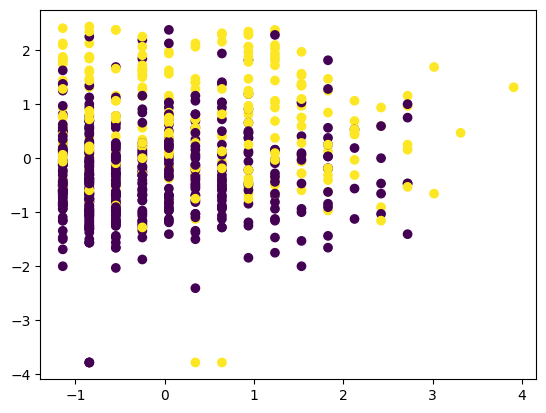

In [11]:
plt.scatter(x[:,0], x[:,1], c = y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
X_train.shape

(614, 8)

In [ ]:
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 1, activation = 'sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100, validation_data = (X_test, y_test))

# 1. how to select appropriate optimizer
# 2. No. of nodes in a layer
# 3. how to select no. of layers
# 4. all in all one model

# do above all automatically using Keras-Tunar

In [ ]:
#pip install -U keras-tuner

# 1. how to select appropriate optimizer

In [14]:
def build_model(hp):
    
    model = Sequential()
    
    model.add(Dense(units = 32, activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(units=1, activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta', 'adagrad'])
    
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [15]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5)

C:\Users\surya\env312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.5649350881576538

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 25s


In [17]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd', 'rmsprop', 'adadelta', 'adagrad'], 'ordered': False}


In [20]:
tuner.results_summary()


Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
optimizer: adam
Score: 0.7922077775001526

Trial 0 summary
Hyperparameters:
optimizer: rmsprop
Score: 0.7727272510528564

Trial 1 summary
Hyperparameters:
optimizer: sgd
Score: 0.7077922224998474

Trial 3 summary
Hyperparameters:
optimizer: adagrad
Score: 0.6558441519737244

Trial 4 summary
Hyperparameters:
optimizer: adadelta
Score: 0.5649350881576538


# TO get best hyperparameters

In [18]:
best_hp = tuner.get_best_hyperparameters()[0].values

In [19]:
best_hp

{'optimizer': 'adam'}

# to get best model

In [ ]:
model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
model.summary()

In [ ]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100, initial_epoch = 5, validation_data = (X_test, y_test))

# 2. How many right neurons are should be there in layer

In [ ]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units', 8, 128, )#step = 8)
    model.add(Dense(units = units, activation = 'relu', input_dim = 8))
    model.add(Dense(units = 1, activation  = 'sigmoid'))

    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'mydir', project_name = 'prakash')

In [ ]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
model = tuner.get_best_models(num_models = 1)[0]

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, initial_epoch = 6)

# 3. how to select no. of layers¶

In [ ]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(units = 72, activation = 'relu', input_dim = 8))
    
    for i in range(hp.Int('num layers', min_value = 1, max_value = 10)):
        model.add(Dense(72, activation = 'relu'))
    
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model, 
                       objective = 'val_accuracy', 
                       max_trials = 5, directory = 'mydir', project_name = 'num_layers')

In [ ]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

In [ ]:
tuner.get_best_hyperparameters()[0].values

In [ ]:
tuner.get_best_models(num_models=1)[0]

In [ ]:
model.fit(X_train, y_train, epochs = 100, initial_epoch = 6, validation_data = (X_test, y_test))

# 4. All in all one model
## Do above all automatically using Keras-Tunar

In [22]:
def build_model(hp):
    
    model = Sequential()
    
    counter = 0
    
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i), min_value = 8, max_value= 120, step = 8), activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh']), input_dim = X_train.shape[1]))
            model.add(Dropout(hp.Choice('dropout'+str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(Dense(hp.Int('units'+str(i), min_value = 8, max_value= 120, step = 8), activation = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh'])))
            model.add(Dropout(hp.Choice('dropout'+str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        counter += 1

    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(optimizer = hp.Choice('optimizer', values = ['sgd', 'adam', 'rmsprop', 'adadelta', 'nadam']), 
                                       loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

In [23]:
tuner = kt.RandomSearch(build_model, 
                        objective = 'val_accuracy', 
                        max_trials = 3, 
                        directory = 'mydir', 
                        project_name = 'final1')

Reloading Tuner from mydir\final1\tuner0.json


In [24]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

In [25]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 16,
 'activation': 'tanh',
 'dropout0': 0.2,
 'optimizer': 'rmsprop',
 'units1': 8,
 'dropout1': 0.1,
 'units2': 8,
 'dropout2': 0.1}

In [26]:
model = tuner.get_best_models(num_models = 1)[0]

In [27]:
model.fit(X_train, y_train, epochs = 200, initial_epoch = 5, validation_data = (X_test, y_test))

Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7508 - loss: 0.5272 - val_accuracy: 0.7922 - val_loss: 0.4718
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7313 - loss: 0.5204 - val_accuracy: 0.7857 - val_loss: 0.4636
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7378 - loss: 0.5147 - val_accuracy: 0.7922 - val_loss: 0.4566
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7524 - loss: 0.5081 - val_accuracy: 0.7857 - val_loss: 0.4507
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7427 - loss: 0.5118 - val_accuracy: 0.7857 - val_loss: 0.4479
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7427 - loss: 0.4972 - val_accuracy: 0.7857 - val_loss: 0.4451
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7590 - loss: 0.5011 - val_accuracy: 0.7662 - val_loss: 0.4468
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7557 - loss: 0.4930 - val_accuracy

# Hyperband

In [21]:
tuner = kt.Hyperband(
    build_model,               
    objective='val_accuracy',  
    max_epochs=20,             # maximum number of epochs to train
    factor=3,                  # reduction factor for early stopping
    directory='mydir',
    project_name='final1_hyperband'
)


In [22]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7077922224998474

Best val_accuracy So Far: 0.7662337422370911
Total elapsed time: 00h 00m 09s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam',
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [24]:
model = tuner.get_best_models(num_models = 1)[0]

C:\Users\surya\env312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
model.fit(X_train, y_train, epochs = 200, initial_epoch = 5, validation_data = (X_test, y_test))

Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7378 - loss: 0.5555 - val_accuracy: 0.7857 - val_loss: 0.5308
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7427 - loss: 0.5247 - val_accuracy: 0.7987 - val_loss: 0.5040
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7573 - loss: 0.5046 - val_accuracy: 0.8247 - val_loss: 0.4871
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7687 - loss: 0.4905 - val_accuracy: 0.8312 - val_loss: 0.4756
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7736 - loss: 0.4809 - val_accuracy: 0.8312 - val_loss: 0.4685
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7769 - loss: 0.4734 - val_accuracy: 0.8247 - val_loss: 0.4637
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7769 - loss: 0.4684 - val_accuracy: 0.8247 - val_loss: 0.4601
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7736 - loss: 0.4645 - val_accuracy: 0.831

# BayesianOptimization

In [27]:
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,             # number of hyperparameter configs to try
    num_initial_points=2,      # random trials before starting Bayesian optimization
    directory='mydir',
    project_name='final1_bayes'
)


In [28]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.8051947951316833

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 23s


In [29]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [30]:
model = tuner.get_best_models(num_models = 1)[0]

C:\Users\surya\env312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [31]:
model.fit(X_train, y_train, epochs = 200, initial_epoch = 5, validation_data = (X_test, y_test))

Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7541 - loss: 0.5160 - val_accuracy: 0.8052 - val_loss: 0.5005
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7573 - loss: 0.5026 - val_accuracy: 0.8052 - val_loss: 0.4935
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.4939 - val_accuracy: 0.7922 - val_loss: 0.4886
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7622 - loss: 0.4873 - val_accuracy: 0.7857 - val_loss: 0.4854
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7606 - loss: 0.4818 - val_accuracy: 0.7857 - val_loss: 0.4827
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7655 - loss: 0.4771 - val_accuracy: 0.7922 - val_loss: 0.4785
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7622 - loss: 0.4737 - val_accuracy: 0.7987 - val_loss: 0.4774
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 0.4707 - val_accuracy: 0.792